<a href="https://colab.research.google.com/github/aglucaci/Bioinformatics-For-All/blob/master/Bioinformatics_For_All_Volcano_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

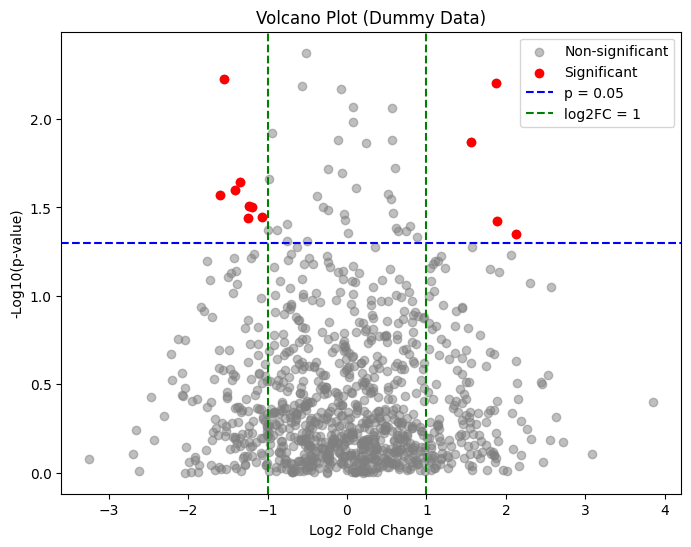

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy data for the volcano plot
np.random.seed(42)
data = pd.DataFrame({
    'log2FoldChange': np.random.randn(1000),  # log2 fold change values
    'pvalue': np.random.uniform(0.001, 1, 1000)  # p-values
})

# Calculate -log10(p-value) for plotting
data['-log10pvalue'] = -np.log10(data['pvalue'])

# Define thresholds for significance
log2FC_threshold = 1  # threshold for log2 fold change
pvalue_threshold = 0.05  # threshold for p-value

# Create a column for labeling points as "Significant"
data['significant'] = (abs(data['log2FoldChange']) > log2FC_threshold) & (data['pvalue'] < pvalue_threshold)

# Plot the volcano plot
plt.figure(figsize=(8, 6))

# Scatter plot for non-significant points
plt.scatter(data['log2FoldChange'], data['-log10pvalue'], color='gray', alpha=0.5, label='Non-significant')

# Scatter plot for significant points
plt.scatter(data[data['significant']]['log2FoldChange'], data[data['significant']]['-log10pvalue'],
            color='red', label='Significant')

# Add horizontal line for p-value threshold
plt.axhline(-np.log10(pvalue_threshold), color='blue', linestyle='--', label=f'p = {pvalue_threshold}')

# Add vertical lines for log2 fold change thresholds
plt.axvline(log2FC_threshold, color='green', linestyle='--', label=f'log2FC = {log2FC_threshold}')
plt.axvline(-log2FC_threshold, color='green', linestyle='--')

# Labels and title
plt.title('Volcano Plot (Dummy Data)')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
!pip install altair
!pip install altair_viewer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 9.9 MB/s eta 0:00:00


In [ ]:
import altair as alt
import pandas as pd
import numpy as np

# Generate dummy data for the volcano plot
np.random.seed(42)
data = pd.DataFrame({
    'log2FoldChange': np.random.randn(1000),  # log2 fold change values
    'pvalue': np.random.uniform(0.001, 1, 1000)  # p-values
})

# Calculate -log10(p-value) for plotting
data['-log10pvalue'] = -np.log10(data['pvalue'])

# Define thresholds for significance
log2FC_threshold = 1 # threshold for log2 fold change
pvalue_threshold = 0.05  # threshold for p-value

# Create a column for labeling points as "Significant"
data['significant'] = (abs(data['log2FoldChange']) > log2FC_threshold) & (data['pvalue'] < pvalue_threshold)

# Create a base chart for the scatter plot
base = alt.Chart(data).mark_circle(size=60).encode(
    x=alt.X('log2FoldChange', title='Log2 Fold Change'),
    y=alt.Y('-log10pvalue', title='-Log10(p-value)')
)

# Color encoding based on significance
scatter = base.encode(
    color=alt.condition(
        alt.datum.significant,
        alt.value('red'),  # color for significant points
        alt.value('gray')  # color for non-significant points
    ),
    tooltip=['log2FoldChange', 'pvalue', '-log10pvalue']
)

# Vertical lines for log2 fold change threshold
vline_positive = alt.Chart(pd.DataFrame({'x': [log2FC_threshold]})).mark_rule(color='green', strokeDash=[5,5]).encode(x='x')
vline_negative = alt.Chart(pd.DataFrame({'x': [-log2FC_threshold]})).mark_rule(color='green', strokeDash=[5,5]).encode(x='x')

# Horizontal line for p-value threshold
hline = alt.Chart(pd.DataFrame({'y': [-np.log10(pvalue_threshold)]})).mark_rule(color='blue', strokeDash=[5,5]).encode(y='y')

# Combine the scatter plot and threshold lines
volcano_plot = scatter + vline_positive + vline_negative + hline

# Display the chart
volcano_plot.properties(
    title='Volcano Plot (Altair Example)',
    width=1200,
    height=800
)

volcano_plot

alt.LayerChart(...)